In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

/Users/sheldon.smickley/anaconda/envs/bbc/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/sheldon.smickley/anaconda/envs/bbc/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


## First thing is we want to quantify our outcomes with the get_dummies method, this will allow us to clearly plot out the animals that were euthanized or adopted, I also like to lower the columns in order to work with some cleaner data

In [5]:
df_outcome = pd.get_dummies(df['OutcomeType'])

In [6]:
df = pd.concat([df, df_outcome], axis=1)

In [7]:
df.columns = map(lambda x: x.lower(), df.columns)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 15 columns):
animalid           26729 non-null object
name               19038 non-null object
datetime           26729 non-null object
outcometype        26729 non-null object
outcomesubtype     13117 non-null object
animaltype         26729 non-null object
sexuponoutcome     26728 non-null object
ageuponoutcome     26711 non-null object
breed              26729 non-null object
color              26729 non-null object
adoption           26729 non-null float64
died               26729 non-null float64
euthanasia         26729 non-null float64
return_to_owner    26729 non-null float64
transfer           26729 non-null float64
dtypes: float64(5), object(10)
memory usage: 3.1+ MB


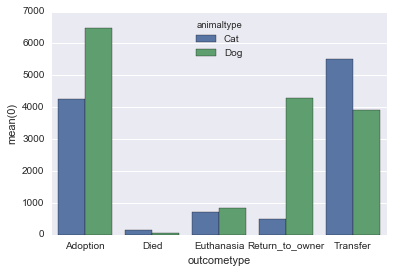

In [9]:
test = df[['animaltype','outcometype','breed']].groupby(['animaltype','outcometype']).size().reset_index()
df.datetime = pd.to_datetime(df.datetime)
sns.barplot(x='outcometype',y=0,hue='animaltype',data=test)

In [10]:
def remove_mix(item):
    if 'Mix' in item:
        x = item.split(' ')
        return ' '.join(x[:len(x)-1])
    else:
        return item
    
#remove_mix('Shetland Sheepdog Mix')

df['breed'] = df['breed'].apply(remove_mix)

In [11]:
#df.breed.value_counts()

In [12]:
'''# Define the aggregation calculation

aggregations = {
    'adoption': {
        'num_adoptions':'count'
    },
    'died': {
        'num_died':'count'
    },
    'euthanasia':{
        'num_euthanized':'count'
    },
    'return_to_owner':{
        'num_rto':'count'
    },
    'transfer':{
        'num_xfer':'count'
    }
}
'''
aggregations = {
    'adoption':'sum',
    'died':'sum',
    'euthanasia':'sum',
    'return_to_owner':'sum',
    'transfer':'sum'
    }
dog_breed = df[df.animaltype == 'Dog'].groupby(['breed']).agg(aggregations).reset_index()
cat_breed = df[df.animaltype == 'Cat'].groupby(['breed']).agg(aggregations).reset_index()

In [13]:
cat_breed['total'] = cat_breed.sum(axis=1)
cat_breed['total_normalized'] = cat_breed['total'].values.astype(float)
cat_breed['zscore'] = (cat_breed.total_normalized - cat_breed.total_normalized.mean())/cat_breed.total_normalized.std(ddof=0)
cat_breed['transfer_pc'] = cat_breed.transfer / cat_breed.total * 100
cat_breed['adoption_pc'] = cat_breed.adoption / cat_breed.total * 100
cat_breed['rto_pc'] = cat_breed.return_to_owner / cat_breed.total * 100
cat_breed['died_pc'] = cat_breed.died / cat_breed.total * 100
cat_breed['euth_pc'] = cat_breed.euthanasia / cat_breed.total * 100

In [14]:
dog_breed['total'] = dog_breed.sum(axis=1)
dog_breed['total_normalized'] = dog_breed['total'].values.astype(float)
dog_breed['zscore'] = (dog_breed.total_normalized - dog_breed.total_normalized.mean())/dog_breed.total_normalized.std(ddof=0)
dog_breed['transfer_pc'] = dog_breed.transfer / dog_breed.total * 100
dog_breed['adoption_pc'] = dog_breed.adoption / dog_breed.total * 100
dog_breed['rto_pc'] = dog_breed.return_to_owner / dog_breed.total * 100
dog_breed['died_pc'] = dog_breed.died / dog_breed.total * 100
dog_breed['euth_pc'] = dog_breed.euthanasia / dog_breed.total * 100

In [16]:
cat_breed.head(10)

,breed,transfer,adoption,return_to_owner,died,euthanasia,total,total_normalized,zscore,transfer_pc,adoption_pc,rto_pc,died_pc,euth_pc
0,Abyssinian,0.0,2.0,0.0,0.0,0.0,2.0,2.0,-0.183501,0.000000,100.000000,0.000000,0.0,0.000000
1,American Shorthair,7.0,0.0,1.0,0.0,1.0,9.0,9.0,-0.178150,77.777778,0.000000,11.111111,0.0,11.111111
2,Angora,2.0,4.0,1.0,0.0,0.0,7.0,7.0,-0.179679,28.571429,57.142857,14.285714,0.0,0.000000
3,Balinese,1.0,4.0,0.0,0.0,0.0,5.0,5.0,-0.181208,20.000000,80.000000,0.000000,0.0,0.000000
4,Bengal,1.0,3.0,1.0,0.0,0.0,5.0,5.0,-0.181208,20.000000,60.000000,20.000000,0.0,0.000000
5,Bombay,1.0,2.0,2.0,0.0,0.0,5.0,5.0,-0.181208,20.000000,40.000000,40.000000,0.0,0.000000
6,British Shorthair,1.0,2.0,1.0,0.0,0.0,4.0,4.0,-0.181972,25.000000,50.000000,25.000000,0.0,0.000000
7,Burmese,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-0.184266,0.000000,100.000000,0.000000,0.0,0.000000
8,Cornish Rex,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.184266,0.000000,0.000000,100.000000,0.0,0.000000
9,Cymric,1.0,1.0,0.0,0.0,0.0,2.0,2.0,-0.183501,50.000000,50.000000,0.000000,0.0,0.000000


In [22]:
dog_breed_perc = dog_breed[['breed','transfer_pc','adoption_pc','rto_pc','died_pc','euth_pc','total', 'zscore']]
cat_breed_perc = cat_breed[['breed','transfer_pc','adoption_pc','rto_pc','died_pc','euth_pc','total', 'zscore']]
dog_breed_perc = dog_breed_perc.round(2)
cat_breed_perc = cat_breed_perc.round(2)

In [23]:
dog_breed_perc.head()

,breed,transfer_pc,adoption_pc,rto_pc,died_pc,euth_pc,total,zscore
0,Affenpinscher,0.0,66.67,33.33,0.0,0.0,6.0,-0.07
1,Afghan Hound,0.0,0.00,100.00,0.0,0.0,1.0,-0.13
2,Airedale Terrier,50.0,16.67,33.33,0.0,0.0,6.0,-0.07
3,Airedale Terrier/Labrador Retriever,100.0,0.00,0.00,0.0,0.0,1.0,-0.13
4,Airedale Terrier/Miniature Schnauzer,0.0,100.00,0.00,0.0,0.0,1.0,-0.13


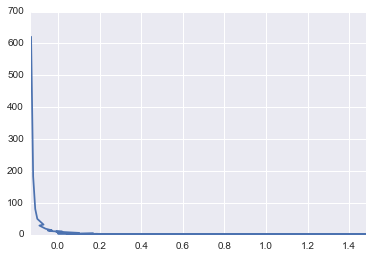

In [58]:
dog_breed_perc.zscore.value_counts().plot(kind='line')

In [ ]:
#dog_breed['mix'] = dog_breed.breed.str.contains("Mix")
